<a href="https://colab.research.google.com/github/ArthurKakande/LLM_applications/blob/main/DFA_24_LLM_APPLICATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install groq langchain-groq langchain-core langchain-community langchain sentence-transformers pypdf chromadb langgraph -q
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 824.6 kB/s eta 0:00:00


# INTERACTING WITH LLMs



In [ ]:
GROQ_API = "your groq api key"

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

model = ChatGroq(
    temperature=0,
    model="llama3-70b-8192",
    api_key=GROQ_API,
)


In [ ]:

system = "You are a helpful assistant."
human = "{text}"
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chain = prompt | model
chain.invoke({"text": "Explain the importance of low latency for LLMs."})

AIMessage(content="Low latency is crucial for Large Language Models (LLMs) because it directly impacts the user experience, model performance, and overall efficiency of language-based applications. Here are some reasons why low latency is essential for LLMs:\n\n1. **Real-time Interaction**: LLMs are often used in applications that require real-time interaction, such as chatbots, virtual assistants, and language translation systems. Low latency ensures that the model responds quickly to user input, providing a seamless and engaging experience.\n2. **Conversational Flow**: In conversational AI, latency can disrupt the natural flow of conversation. High latency can lead to awkward pauses, making the interaction feel unnatural and frustrating. Low latency helps maintain a smooth conversation, allowing users to engage more naturally with the model.\n3. **Model Performance**: LLMs rely on complex algorithms and massive datasets to generate responses. High latency can lead to increased comput

## **Streaming**

In [ ]:
model_streaming = ChatGroq(
    temperature=0,
    model="llama3-70b-8192",
    api_key=GROQ_API,
    streaming = True
)


In [ ]:
chunks = []
async for chunk in model_streaming.astream("hello. tell me something about yourself"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

|Hello|!| I|'m| thrilled| to| meet| you|.| I|'m| L|La|MA|,| an| AI| assistant| developed| by| Meta| AI| that| can| understand| and| respond| to| human| input| in| a| convers|ational| manner|.| I|'m| a| large| language| model|,| which| means| I|'ve| been| trained| on| a| massive| dataset| of| text| from| the| internet| and| can| generate| human|-like| responses|.

|Here| are| a| few| fun| facts| about| me|:

|1|.| **|I|'m| a| quick| learner|**:| I| can| learn| and| adapt| to| new| topics| and| tasks| in| a| matter| of| seconds|.
|2|.| **|I|'m| mult|ilingual|**:| I| can| understand| and| respond| in| multiple| languages|,| including| English|,| Spanish|,| French|,| German|,| Italian|,| and| many| more|.
|3|.| **|I| have| a| vast| knowledge| base|**:| I|'ve| been| trained| on| a| massive| dataset| of| text|,| which| means| I| have| access| to| a| vast| amount| of| knowledge| on| various| topics|,| from| science| and| history| to| entertainment| and| culture|.
|4|.| **|I|'m| creative|**:| 

# RAG


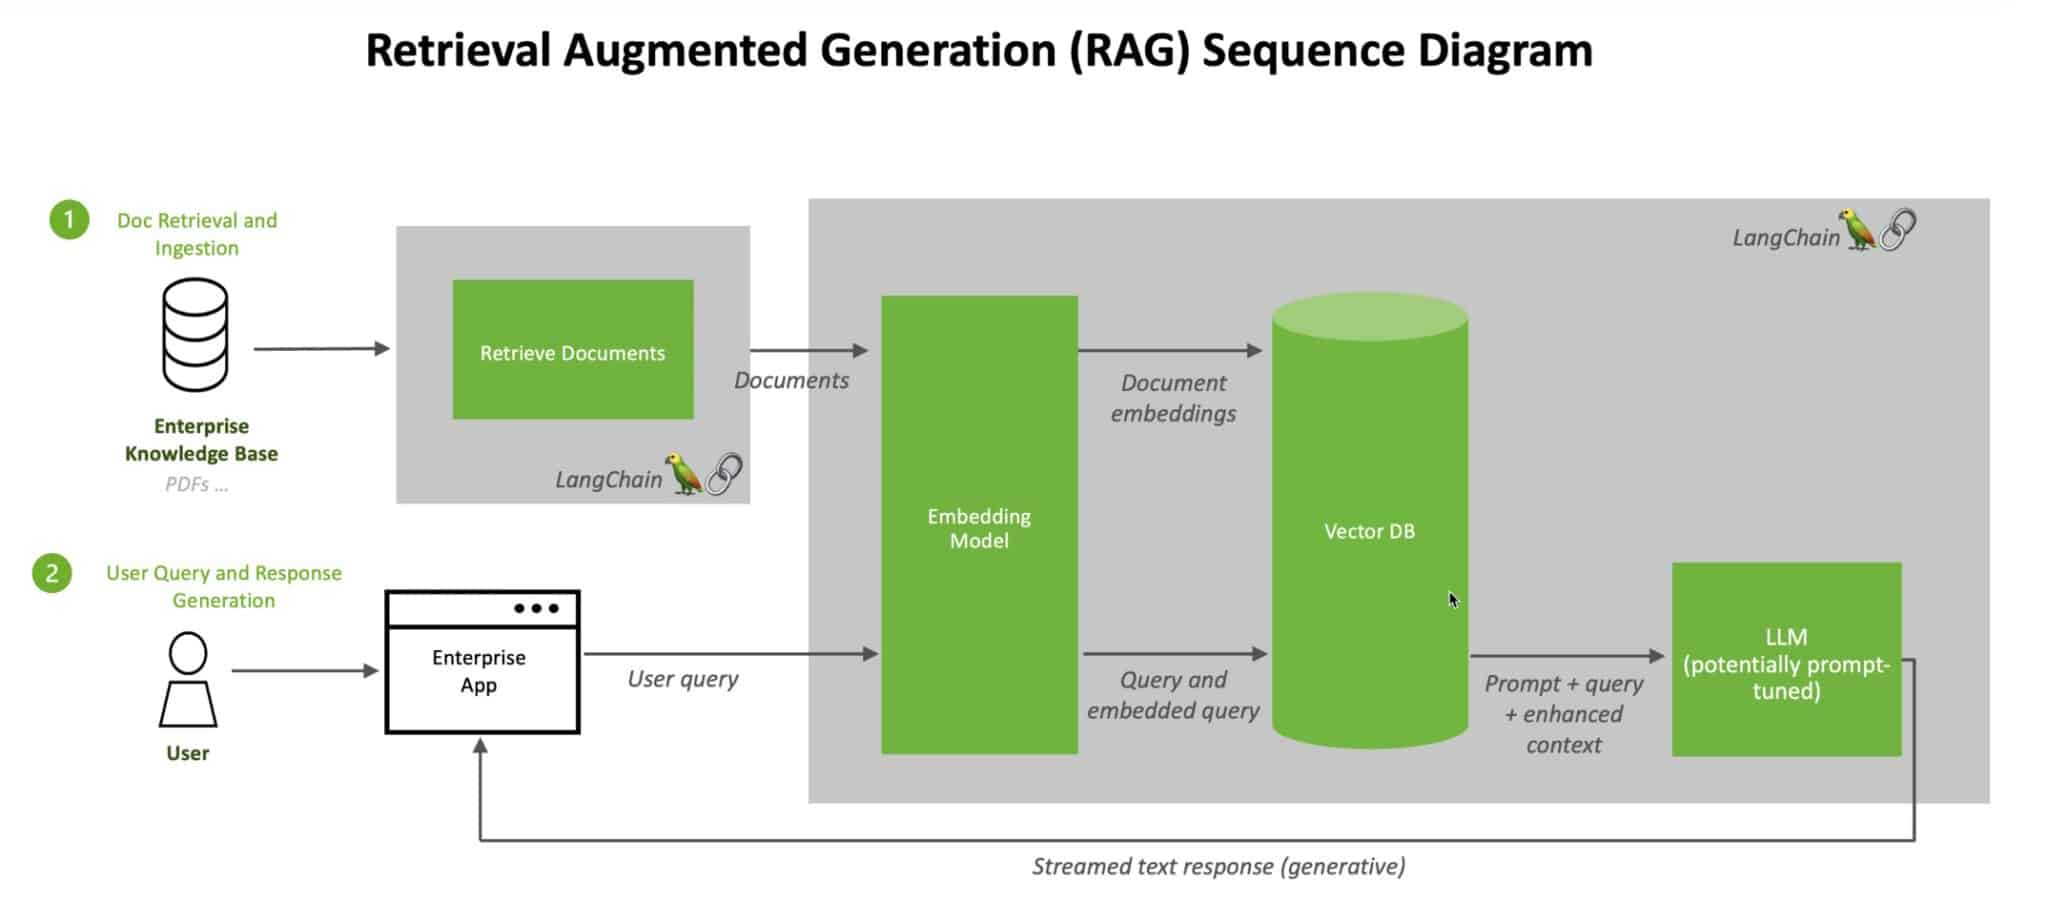

In [ ]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

In [ ]:
embedding = HuggingFaceBgeEmbeddings(
    model_name='BAAI/bge-base-en',
    model_kwargs={'device': 'cpu'},
    encode_kwargs={'normalize_embeddings': True}
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
loader = PyPDFLoader(file_path="/content/Dada-Disinfo-report.pdf")
documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=10)
chunked_documents = text_splitter.split_documents(documents)

In [ ]:
chunked_documents

[Document(metadata={'source': '/content/Dada-Disinfo-report.pdf', 'page': 2}, page_content='3Authors & Contributors\nLead Authors: Mark Kaigwa, Daniel Mutuku, and Francis Gikaru.\nContributors: Irene Mwendwa, Arthur Kakande, and Bonaventure Saturday.\nJune 2024.\nSuggested Citation\nKaigwa M., Mutuku D., and Gikaru F . (2024). Dada Disinfo: Report on Technology-Facilitated Gender-Based \nViolence in Kenya\nRetrievable from nendo.co.ke/dadadisinfo\nDisclaimer: This report is made possible by the generous support of the American people through the United States Agency \nfor International Development (USAID), through DAI Global LLC, to Nendo Limited. The contents are the responsibility \nof Nendo and do not necessarily reflect the views of DAI Global LLC, USAID, or the United States Government.'),
 Document(metadata={'source': '/content/Dada-Disinfo-report.pdf', 'page': 3}, page_content='4Contents\nAuthors & Contributors 3\nSuggested Citation 3\nAcknowledgements  6\nList of Abbreviations 

In [ ]:
vectordb = Chroma.from_documents(
    documents=documents,
    embedding=embedding
)

In [ ]:
vectordb.similarity_search("OGBV", k = 3)

[Document(metadata={'page': 22, 'source': '/content/Dada-Disinfo-report.pdf'}, page_content='23\nFigure 5. Lowest TFGBV Awareness Among Males 18-24 years\nAmong the various types of TFGBV mentioned in the online survey, online harassment emerged as the most \nrecognized form among respondents while stalking, doxxing, cyber mobbing, impersonation, and defamation, \nwere generally less known. The results underscore the importance of raising awareness and providing education on \nthe various manifestations of TFGBV beyond just online harassment. \nThe respondents were tested to see their opinion on the difference between TFGBV and Physical GBV. The \nrespondents were asked for their opinions on the distinction between TFGBV and physical GBV to assess their \nawareness levels. 60% of female respondents recognized a clear difference between the two, indicating their \nunderstanding of these nuanced distinctions. Conversely, male respondents, particularly those aged 18 to 24, did \nnot perce

In [ ]:
PROMPT_TEMPLATE = """
Answer the question based only on the following context:
{context}
 - -
Answer the question based on the above context: {question}
"""

In [ ]:
def chat(query_text):
    results = vectordb.similarity_search(query_text, k=3)
    context_text = "\n\n - -\n\n".join([doc.page_content for doc in results])

    prompt_template = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)
    prompt = prompt_template.format(context=context_text, question=query_text)

    response_text = model.predict(prompt)

    return response_text

In [ ]:
chat("what is TFGBV ?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


'Based on the provided context, TFGBV stands for Technology-Facilitated Gender-Based Violence.'

In [ ]:
chat("why is TFGBV important")

'Based on the provided context, TFGBV is important because:\n\n1. It has severe emotional and psychological effects on individuals, leading to emotional distress, damage to self-esteem and confidence, and even suicidal thoughts or death by suicide.\n2. It is a common form of violence, with online harassment being the most recognized form among respondents, and stalking, doxxing, cyber mobbing, impersonation, and defamation being less known but still prevalent.\n3. It disproportionately affects women, who are more likely to experience TFGBV from individuals they know, such as ex-partners, friends, or family members.\n4. It requires tailored education and awareness to help both men and women recognize and combat TFGBV effectively, as it operates with speed and multi-layered perpetration, making it difficult for survivors to recognize they are being targeted.\n5. It has a significant impact on the community, manifesting in psychological and emotional distress, and highlighting the need to

In [ ]:
chat("who are the authors of the report")

'The authors of the report are Mark Kaigwa, Daniel Mutuku, and Francis Gikaru.'

In [ ]:
chat("who are the co-authors")

'According to the context, there are no co-authors. The authors of the report are:\n\n1. Mark Kaigwa\n2. Daniel Mutuku\n3. Francis Gikaru\n\nThe contributors are:\n\n1. Irene Mwendwa\n2. Arthur Kakande\n3. Bonaventure Saturday'

In [ ]:
print(chat("which people provided help on the report"))

Based on the provided context, the following people provided help on the report:

1. Irene Mwendwa
2. Arthur Kakande
3. Bonaventure Saturday
4. Christiy Coster
5. Priscila Powell
6. Garnett Achieng (peer review and insights)
7. Sophie (editor)
8. The Pollicy team, including:
   - Irene
   - Arthur
   - Bonaventure
   - Wilson
   - Doreen
   - Varaidzo
   - Rashid
   - Bonnita
   - Cate
9. The Nendo team, including:
   - Anne
   - Joan
   - Betty
   - Daniel
   - Francis
   - Jane
   - Hottensiah
   - Wambui
   - Lavender
   - Trevor
   - Marcus
   - Nova
   - Melanie


# AI AGENTS

In [ ]:
import os

os.environ["TAVILY_API_KEY"] = "YOUR TAVILY API KEY"

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2)
search_results = search.invoke("what is the weather in Kenya today")
search_results

[{'url': 'https://www.cbsnews.com/newyork/news/nyc-weather-saturday-june-8-2024-new-york-weekend-forecast/',
  'content': "By Matthew DeLucia Updated on: June 8, 2024 / 11:33 AM EDT / CBS New York Saturday forecast  First Alert Weather maps More from CBS News First published on June 8, 2024 / 11:31 AM EDT  Looking ahead The nice weather looks to continue right into the new week before the heat and humidity return.  Sunday forecast Sunday won't be quite as perfect, but it won't be a washout either!  Most of the Tri-State Areas looks to remain dry, but some showers are possible far north and west of New York City late at night and around dawn. "},
 {'url': 'https://uk.news.yahoo.com/county-durham-hotter-barcelona-heatwave-095300985.html',
  'content': "The forecast for the rest of the week according to The Met Office is as follows: Darlington Monday's sunny morning is expected to turn cloudy by lunchtime with a high of 25°C and lows of 17°C.  Beryl is expected to remain powerful as it mo

In [ ]:
tools = [search]

In [ ]:
from langchain_core.messages import HumanMessage

response = model.invoke([HumanMessage(content="hi!")])
response.content

"Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

## Create the agent

In [ ]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(model, tools)

In [ ]:
response = agent_executor.invoke({"messages": [HumanMessage(content="hi!")]})

response["messages"]

[HumanMessage(content='hi!', id='e166bde4-33b4-4512-9327-cabd349ead64'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8j16', 'function': {'arguments': '{"query":"hi"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 941, 'total_tokens': 988, 'completion_time': 0.134285714, 'prompt_time': 0.337939694, 'queue_time': None, 'total_time': 0.472225408}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_7ab5f7e105', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2663ace8-4794-4eab-8ec6-e49088acca86-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'hi'}, 'id': 'call_8j16'}], usage_metadata={'input_tokens': 941, 'output_tokens': 47, 'total_tokens': 988}),
 ToolMessage(content="HTTPError('400 Client Error: Bad Request for url: https://api.tavily.com/search')", name='tavily_search_results_json', id='2a0347d7-2fcd-4745-ad57-4bead4b4c43a', 

In [ ]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="Who is the owner of tesla, give me details")]}
)
response

{'messages': [HumanMessage(content='Who is the owner of tesla, give me details', id='b27ef27c-1394-4274-93cb-009b0f30cd3a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4rs8', 'function': {'arguments': '{"query":"Who is the owner of Tesla"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 950, 'total_tokens': 1002, 'completion_time': 0.148571429, 'prompt_time': 0.1668758, 'queue_time': None, 'total_time': 0.315447229}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_c1a4bcec29', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fe1ae65d-34a9-4314-b38d-41443fadc50e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Who is the owner of Tesla'}, 'id': 'call_4rs8'}], usage_metadata={'input_tokens': 950, 'output_tokens': 52, 'total_tokens': 1002}),
  ToolMessage(content='[{"url": "https://www.biography.com/business-leaders/elon-musk

In [ ]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="What are the major protests that have happened in kenya recently and what are they about ?")]}
)
response

{'messages': [HumanMessage(content='What are the major protests that have happened in kenya recently and what are they about ?', id='2ca9fd97-5e6b-4d0a-9a2f-56d1635301a6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_84c6', 'function': {'arguments': '{"query":"recent protests in kenya"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 957, 'total_tokens': 1008, 'completion_time': 0.145714286, 'prompt_time': 0.191157397, 'queue_time': None, 'total_time': 0.33687168300000003}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_c1a4bcec29', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-21e86500-b3c1-4c8f-9f11-a0897136a1c5-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent protests in kenya'}, 'id': 'call_84c6'}], usage_metadata={'input_tokens': 957, 'output_tokens': 51, 'total_tokens': 1008}),
  ToolMessage(content='[{"url